## KNN 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('creditcard.csv')

In [5]:
data.shape

(284807, 31)

In [7]:
data.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [9]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

In [19]:
data['Amount']=scaler.fit_transform(data[['Amount']])

In [21]:
print(data['Amount'])

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64


In [23]:
x=data.drop(columns=['Class'],axis=1)

In [25]:
y=data['Class']

In [27]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 30)
(56962, 30)
(227845,)
(56962,)


In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
model=KNeighborsClassifier(n_neighbors=7)

In [39]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [41]:
y_pred=model.predict(x_test)

In [43]:
from sklearn.metrics import classification_report,accuracy_score

In [45]:
clas=classification_report(y_test,y_pred)

In [47]:
print(clas)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.09      0.17        98

    accuracy                           1.00     56962
   macro avg       1.00      0.55      0.58     56962
weighted avg       1.00      1.00      1.00     56962



In [49]:
err=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    yp=knn.predict(x_test)
    err.append(np.mean(yp!=y_test))
    

In [51]:
for i in err:
    print(i)

0.001439556195358309
0.0014922228854323935
0.0014922228854323935
0.001544889575506478
0.001544889575506478
0.0015624451388645062
0.0015624451388645062
0.0016151118289385905
0.0016151118289385905
0.0016151118289385905
0.0016151118289385905
0.0016326673922966188
0.0016326673922966188
0.001650222955654647
0.001650222955654647
0.001667778519012675
0.001667778519012675
0.0016853340823707033
0.0016853340823707033


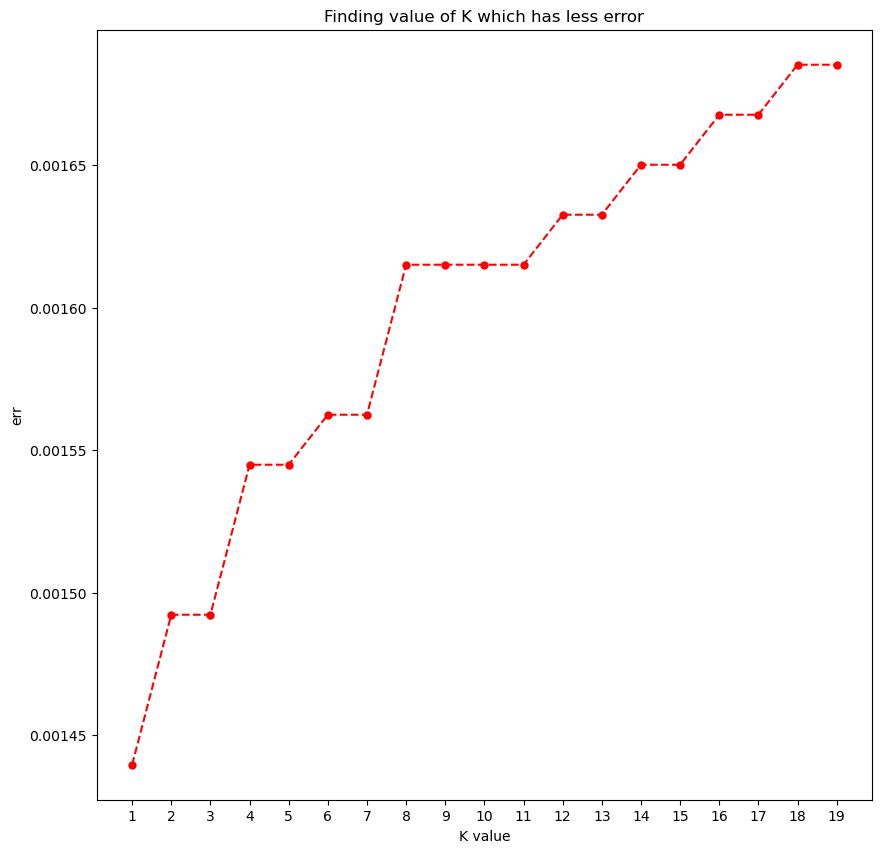

In [197]:
plt.figure(figsize=(10,10),dpi=100)
plt.plot(range(1,20),err,marker='o',linestyle='dashed',color='red',markersize=5)
plt.xlabel("K value")
plt.ylabel("err")
plt.title("Finding value of K which has less error")
plt.xticks(range(1, 20))
plt.show()

## It was showing that value of K if its 1 then it has less error

In [199]:
arr=[1.23, -0.87, 0.34, -1.22, 2.11, -3.45, 1.56, -0.98, 0.67, -1.45,
                      2.56, -3.21, 1.78, -0.56, 0.12, -1.89, 3.21, -2.45, 0.89, -1.23,
                      2.98, -3.67, 1.45, -0.76, 0.23, -1.56, 3.12, -2.89, -4.5,250.75]

In [201]:
dff=pd.DataFrame([arr],columns=x_test.columns)

In [211]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
df_scaled = scaler.transform(df)  

df_scaled = pd.DataFrame(df_scaled, columns=x_test.columns)  
pred = knn.predict(df_scaled)
print("Prediction : "if(pred==1): ,"Frauad","no")

SyntaxError: invalid syntax (2236979758.py, line 7)